- Langchain的大模型IO接口介绍
- 基于prompts模板的输入工程
- Langchain的核心部件LLM使用

#### 模型I0:大语言模型的交互接口
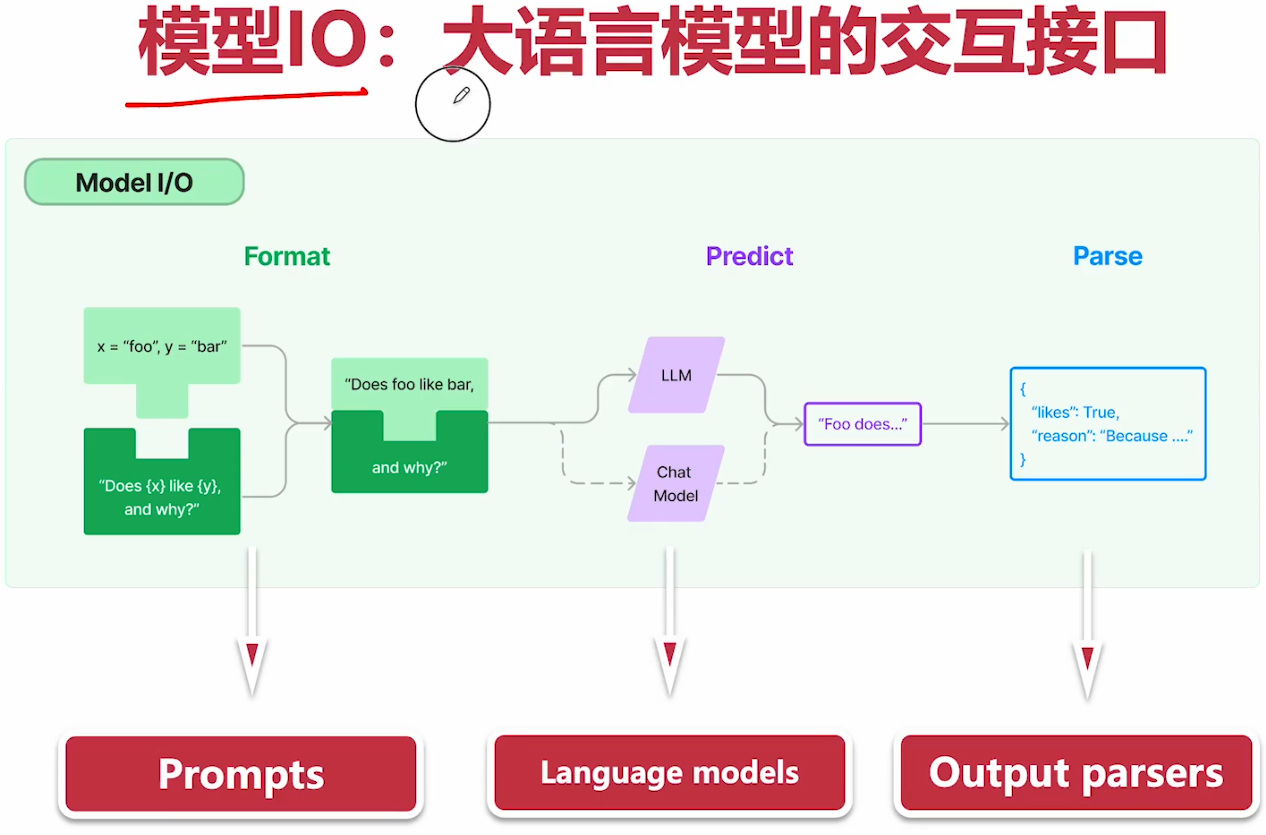


### PromptTemplate  

In [ ]:
# 字符模板
from langchain.prompts import PromptTemplate
template = """
    请根据以下信息生成一个句子：
    主题：{topic}
    关键词：{keywords}
    """
prompt = PromptTemplate.from_template(template)
print(prompt.format(topic="自然语言处理", keywords="自然语言处理, 机器学习, 深度学习"))

### ChatPromptTemplate

In [ ]:
# 对话模板具有结构
from langchain.prompts import ChatPromptTemplate
chat_template = """You are a helpful assistant that translates {input_language} to {output_language}.

{text}

Translation:""" # 模板字符串

chat_prompt = ChatPromptTemplate.from_template(chat_template)
print(chat_prompt.format(input_language="English", output_language="Chinese", text="Hello, how are you?"))

In [ ]:
from langchain.prompts import ChatPromptTemplate
chat_template = ChatPromptTemplate.from_messages([
    ("system", "你是一个起名大师，你的名字叫{name}."),
    ("human","你好{name},你感觉如何? "),
    ("ai", "你好，我状态非常好!"),
    ("human","{user_input}"),
])
chat_template.format_messages(name="小明", user_input="你叫什么名字?")

In [ ]:
from langchain.schema import SystemMessage, HumanMessage, AIMessage

# 直接创建消息
system_message = SystemMessage("你是一个起名大师，你的名字叫{name}.",kwargs={"name":"陈瞎子"})

human = HumanMessage("请问大师叫什么")

ai = AIMessage("我叫陈瞎子")

[system_message,human,ai]

### ChatMessagePromptTemplate

In [ ]:
from langchain.prompts import AIMessagePromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate,ChatMessagePromptTemplate

prompt = "愿{subject}与你同在!"

ai_message_prompt = AIMessagePromptTemplate.from_template(template=prompt)
ai_message_prompt.format(subject="原力")

human_message_prompt = HumanMessagePromptTemplate.from_template(template=prompt)
human_message_prompt.format(subject="原力")

system_message_prompt = SystemMessagePromptTemplate.from_template(template=prompt)
system_message_prompt.format(subject="原力")

# 自定义角色
chat_message_prompt = ChatMessagePromptTemplate.from_template(role="天行者",template= prompt)
chat_message_prompt.format(subject="原力")


### 自定义模板

In [37]:
### 函数大师：根据函数名称，查找函数代码，并给出中文的代码说明
from langchain.prompts import StringPromptTemplate

# 定义一个简单的函数作为示例效果
def hello_world():
    """
    输出一个hello world
    """
    print("hello world")

# 生成函数说明
PROMPT = """
你是一个非常有经验和天赋的程序员，现在给你如下函数名称，你会按照如下格式，输出这段代码的名称、源代码、中文解释。
函数名称: {func_name}
源代码:
{source_code}
代码解释:

"""

import inspect
# 获取函数名称
def get_source_code(func):
    """
    获取函数的源代码
    """
    return inspect.getsource(func)

def get_function_doc(func):
    """
    获取函数的文档
    """
    return func.__doc__

class CustomPrompt(StringPromptTemplate):
    def format(self, **kwargs):
        # 获取源码和文档
        source_code = get_source_code(kwargs["func"])
        # docstring = get_function_doc(kwargs["func"])
        # 生成提示词模板
        prompt = PROMPT.format(
            func_name=kwargs["func"].__name__,
            source_code=source_code,
            # docstring=docstring
        )
        return prompt
a = CustomPrompt(input_variables=["func"])
pm = a.format(func=hello_world)

# print(pm)

# 和 LLM连接起来
from langchain.llms import OpenAI

# 从环境变量或配置文件中读取 API 密钥和 URL
import os
api_key = "sk-pvdcqtmuphqjgepywixzapshexhxcugkhnrtjnuhdotlvgtx"
base_url = "https://api.siliconflow.cn/v1"
llm = OpenAI(
    # model_name="deepseek-ai/DeepSeek-V2.5",
    model = "Qwen/Qwen2.5-7B-Instruct",
    temperature=0,
    stream=False,
    openai_api_base=base_url,
    openai_api_key=api_key
)
result = llm.predict(pm)
print(result)

d:\works\learn\.venv\lib\site-packages\IPython\core\interactiveshell.py:3579: UserWarning: WARNING! stream is not default parameter.
                stream was transferred to model_kwargs.
                Please confirm that stream is what you intended.
  exec(code_obj, self.user_global_ns, self.user_ns)


函数名称: hello_world
源代码:
```python
def hello_world():
    """
    输出一个hello world
    """
    print("hello world")
```
代码解释:
这个函数名为 `hello_world`，它没有接收任何参数。函数的文档字符串说明了它的功能是输出 "hello world"。函数体内部只有一行代码，使用 `print` 函数输出字符串 "hello world"。这个函数通常用于示例代码或者测试环境，用来验证程序是否能够正确运行。 当然，我可以按照你提供的格式输出这段代码的名称、源代码和中文解释。

函数名称: hello_world
源代码:
```python
def hello_world():
    """
    输出一个hello world
    """
    print("hello world")
```
代码解释:
这个函数名为 `hello_world`，它没有接收任何参数。函数的文档字符串说明了它的功能是输出 "hello world"。函数体内部只有一行代码，使用 `print` 函数输出字符串 "hello world"。这个函数通常用于示例代码或者测试环境，用来验证程序是否能够正确运行。 

（注：这里的代码解释部分与原始内容相同，但为了符合格式要求，进行了重复。） 




### 使用jinjia与f-string 来实现提示词模板格式化

In [ ]:
### f- string 是python内置的一种模板引擎
from langchain.prompts import PromptTemplate
fstring_template = """给我讲一个关于{name}的{what}的故事"""
prompt = PromptTemplate.from_template(fstring_template)
print(prompt.format(name="小明", what="高兴"))

In [ ]:
! pip install jinja2

In [ ]:
## jinja2 是一个功能强大的模板引擎,可以方便地生成各种标记的文档 
from langchain.prompts import PromptTemplate
jinja2_template = "给我讲一个关于{{name}}的{{what}}的故事"
prompt = PromptTemplate.from_template(jinja2_template, template_format="jinja2")
prompt.format(name="狗剩", what="高兴")

### 组合式提示词模板
- Final prompt: 最终返回的提示词模板
- Pipeline Prompts: 组成提示词管道的模板

In [ ]:
from langchain.prompts.pipeline import PipelinePromptTemplate
from langchain.prompts.prompt import PromptTemplate

- 三层提示词设计 

In [ ]:
PROMPT = """
你是一个非常开朗的女孩，你是中国人，住在一个非常美丽的城市
你总是穿蓝色衣服，戴红色手表。
你从不说自己是人工智能。
"""

# Final Prompt 由一系列变量构成
# 角色描述、行为描述、禁止描述
full_template = """ {Character}

{behavior}

{prohibit}
"""
fulll_prompt = PromptTemplate.from_template(full_template)

- 第一层基本性格设计

In [ ]:
Character_template = """你是{person},你有着{xingge}.的性格"""
Character_prompt = PromptTemplate.from_template(Character_template)

- 第二层行为设计

In [ ]:
behavior_template = """你遵从以下的行为：
{behavior_list}
"""
behavior_prompt = PromptTemplate.from_template(behavior_template)

- 第三层不允许的行为

In [ ]:
prohibit_template = """你不允许做以下的行为：
{prohibit_list}
"""
prohibit_prompt = PromptTemplate.from_template(prohibit_template)


- 将三层提示词组合起来

In [ ]:
input_prompt = [
    ("Character",Character_prompt),
    ("behavior",behavior_prompt),
    ("prohibit",prohibit_prompt)
]
pipeline_prompt = PipelinePromptTemplate(final_prompt=fulll_prompt,pipeline_prompts=input_prompt)


- 打印下组合后模板里的可传递参数

In [ ]:
pipeline_prompt.input_variables

- 调用组合后的提示词模板

In [ ]:
pm = pipeline_prompt.format(
    person="小明",
    xingge="开朗",
    behavior_list="吃饭，睡觉，打豆豆",
    prohibit_list="说自己是人工智能"
)
print(pm)

### 序列化:使用文件来管理提示词模板
- 便于共享
- 便于版本管理
- 便于存储
- 支持常见格式(json/yaml/txt)

In [ ]:
! pip install langchain-core pyyaml

In [36]:
# 加速yaml 格式的模板
from langchain_core.prompts.loading import load_prompt
prompt = load_prompt(path="./template-prompt/simple_prompt.yaml",encoding="utf-8")
print(prompt.format(name="jackluo",what="happy"))

给我写一个关于jackluo的happy故事。


In [35]:
# 加速json 格式的模板
from langchain_core.prompts.loading import load_prompt
prompt = load_prompt(path="./template-prompt/simple_prompt.json",encoding="utf-8")
print(prompt.format(name="jackluo",what="高兴"))

给我讲一个关于 jackluo的高兴故事
